# Example: Reading ECoG data from the Goose/Wireless Dataset
Si JIa Li
adapted from Mike Nolan, 2020.06.02, aoLab, UW

In [1]:
# import dependencies - 
# be sure you've installed aopy to your current environment
from aopy import datareader, datafilter
import numpy as np
import matplotlib.pyplot as plt
import json
print('succussfully imported dependent packages')

succussfully imported dependent packages


In [2]:
#test out load trials in python
monkeyDrive = r'E:\OneDrive - UW\projects\Brain EEG\data'
rec_date = '180328'
mat_folder = 'mat'
file_name = 'Trials'
JSON_EXT = '.json'
trial_file_loc = monkeyDrive + '\\'\
                + rec_date +'\\'\
                + mat_folder + '\\'\
                + file_name + JSON_EXT

with open(trial_file_loc,'r') as f:
    trials = json.load(f)
    
data_array_ECoG = datareader.read_trials_lfp(monkeyDrive, trials,
                    task_field = 'ReachStart', bn = np.array([-300, 500]),
                    microdrive_name = 'LM1_ECOG_3', file_type = 'lfp',
                    verbose = False)

In [3]:
data_array_ECoG.shape

(473, 211, 800)

In [5]:
import tables
#the h5 file is saved from matlab built in function
#load the same data that was saved in matlab
fname = r'E:\OneDrive - UW\projects\Brain EEG\data\180328\180328.h5'
hdffile = tables.open_file(fname,'r') #read-only
#get the data from the hdf5 file
table = hdffile.root.trial_data

print(type(table))
print(hdffile)

<class 'tables.array.Array'>
E:\OneDrive - UW\projects\Brain EEG\data\180328\180328.h5 (File) ''
Last modif.: 'Mon Aug 17 12:14:12 2020'
Object Tree: 
/ (RootGroup) ''
/trial_data (Array(1100, 243, 473)) ''



In [14]:
#now loaded the file and then cast into an array
data_array_matlab = np.array(table)
#transpose array to match python loaded
data_array_matlab = np.transpose(data_array_matlab, (2,1,0))
#take a slice
data_array_ECoG_matlab = data_array_matlab[0:data_array_ECoG.shape[0],
                                           0:data_array_ECoG.shape[1],
                                           0:data_array_ECoG.shape[2]]
print(data_array_ECoG_matlab.shape)

(473, 211, 800)


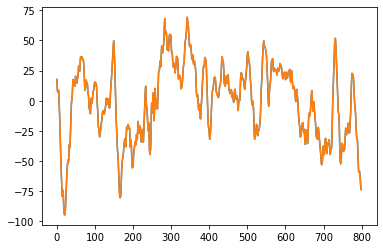

In [15]:
#plot the same data set
plt.plot(data_array_ECoG[0,0,:])
plt.plot(data_array_ECoG_matlab[0,0,:])
plt.show()

In [16]:
# test if same shape, same elements values
# look at the first channel and first trial.
if np.array_equal(data_array_ECoG, data_array_ECoG_matlab):
    print("Congrats! the data is same when loaded from matlab and python")
    print("at least what's what python thinks to the best of its numerical accruracy")
else:
    print("somewhat sad news: some elements may not be the same...")
    
    if np.array_equal(data_array_ECoG[0,0,:],
                     data_array_ECoG_matlab[0,0,:]):
        print("a bit positive news: at least the first trial and the first channel is the same")
    
    print("here is some more positive news: \
hopefully follow the guide,\
you will figure out why")


 


Congrats! the data is same when loaded from matlab and python
at least what's what python thinks to the best of its numerical accruracy


## loop through the channels and trials

then we can loop through the channels and trials to determine which of these are not equal i.e. corrupted, eh? 
and save this into a matrix and display it out, right
afterwards, we can

### save the results into a matrix

In [12]:
trial_mat_shape = data_array_ECoG.shape
if not trial_mat_shape == data_array_ECoG_matlab.shape:
    raise Exception(f"not equal: py matrix's shape {trial_mat_shape} and matlab {data_array_ECoG_matlab.shape}")

#proceed to check the arrays. 
#this needs some better checking
trials_num = trial_mat_shape[0]
channel_num = trial_mat_shape[1]

comp_result = np.zeros((trials_num, channel_num))
#save the trial channel pairs to a list of lists
unmatched_data = list()

from tqdm import tqdm 
#this is parallelism might be really helpful
for ti in tqdm(range(trials_num), desc = "checking parity over trials"):

    
    unmatched_channels = list()
    #the inner for loop steps through the channels
    for ch_i in range(channel_num):
        if np.array_equal(data_array_ECoG[ti,ch_i,:],
                     data_array_ECoG_matlab[ti,ch_i,:]):
            comp_result[ti, ch_i] = 1
        else:
            unmatched_channels.append(ch_i) 
    
    unmatched_data.append((ti, unmatched_channels))

    

Exception: not equal: py matrix's shape (473, 211, 800) and matlab (473, 211, 1100)

### check which (trial, channel) is not matching

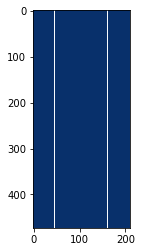

In [30]:
# show the figure
fig = plt.imshow(comp_result, cmap = 'Blues')



In [31]:
#plot the result as an imag
print(r"unmatched data: (trial, channels)")
print(unmatched_data)



unmatched data: (trial, channels)
[(0, [46, 58, 162]), (1, [46, 58, 162]), (2, [46, 58, 162]), (3, [46, 58, 162]), (4, [46, 58, 162]), (5, [46, 58, 162]), (6, [46, 58, 162]), (7, [46, 58, 162]), (8, [46, 58, 162]), (9, [46, 58, 162]), (10, [46, 58, 162]), (11, [46, 58, 162]), (12, [46, 58, 162]), (13, [46, 58, 162]), (14, [46, 58, 162]), (15, [46, 58, 162]), (16, [46, 58, 162]), (17, [46, 58, 162]), (18, [46, 58, 162]), (19, [46, 58, 162]), (20, [46, 58, 162]), (21, [46, 58, 162]), (22, [46, 58, 162]), (23, [46, 58, 162]), (24, [46, 58, 162]), (25, [46, 58, 162]), (26, [46, 58, 162]), (27, [46, 58, 162]), (28, [46, 58, 162]), (29, [46, 58, 162]), (30, [46, 58, 162]), (31, [46, 58, 162]), (32, [46, 58, 162]), (33, [46, 58, 162]), (34, [46, 58, 162]), (35, [46, 58, 162]), (36, [46, 58, 162]), (37, [46, 58, 162]), (38, [46, 58, 162]), (39, [46, 58, 162]), (40, [46, 58, 162]), (41, [46, 58, 162]), (42, [46, 58, 162]), (43, [46, 58, 162]), (44, [46, 58, 162]), (45, [46, 58, 162]), (46, [46,

### examine the specific channels

In [35]:
strange_channels =  unmatched_data[0][1]
print(strange_channels)

[46, 58, 162]


In [41]:
#take a look at an example here
for ch_i in strange_channels:
    print(f'{ch_i}: first 5 data points loaded from python:')
    print(data_array_ECoG[0,ch_i,1:5])

    print(f'{ch_i}: first 5 data points loaded from matlab:')
    print(data_array_ECoG_matlab[0,ch_i,1:5])

1: first 5 data points loaded from python:
[8.682772   3.6844628  0.87325406 0.20130035]
1: first 5 data points loaded from matlab:
[8.68277168 3.68446279 0.87325406 0.20130035]


and I have this revelation of why these channels are special or strange? depending on your point of view. 
1. the revelation is that I manually set these channels to nan, meaning we have to go back and fix these sorts of thigns and 
2. the reason was because these channels recorded values so much greater than other channels
3. that's it and we have fixed our issue for loading the stuff both in python and matlab
4. I would like to say we have passed the test

In [ ]:

#loop through 

#calulate the mean error
data_error = np.sum((data_array_ECoG - data_array_ECoG_matlab)**2) / data_array_ECoG.size


In [33]:
a = np.array([[1,2], [3,4]])
b = np.array([[2,3], [4,5]])

e = np.sum((a - b)**2) / a.size
print(e)
print(a.size)

1.0
4
